In [41]:
import polars as pl
from plotnine import *
import matplotlib.pyplot as plt
plt.show()
from datetime import datetime

In [42]:
df = pl.read_csv("../../data/HRV/time_nonlinear_domain.csv")
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y/%m/%d"))
df = df.drop(["HR", "SDNN", "RMSSD", "pNN50", "TINN", "mean_RRI"])
df.head()

date,CD,ApEn,SD1,SD2,SD1SD2
date,f64,f64,f64,f64,f64
2017-07-24,0.208329,0.922786,14.75156,69.499062,0.212256
2017-07-25,0.2131,0.9482,35.3787,72.7817,0.4861
2017-07-26,0.1454239,0.634698,19.218055,70.521594,0.272513
2017-07-27,0.16728,0.728771,26.979802,102.905322,0.262181
2017-07-28,0.140829,0.58117,29.360692,78.456813,0.374227


0


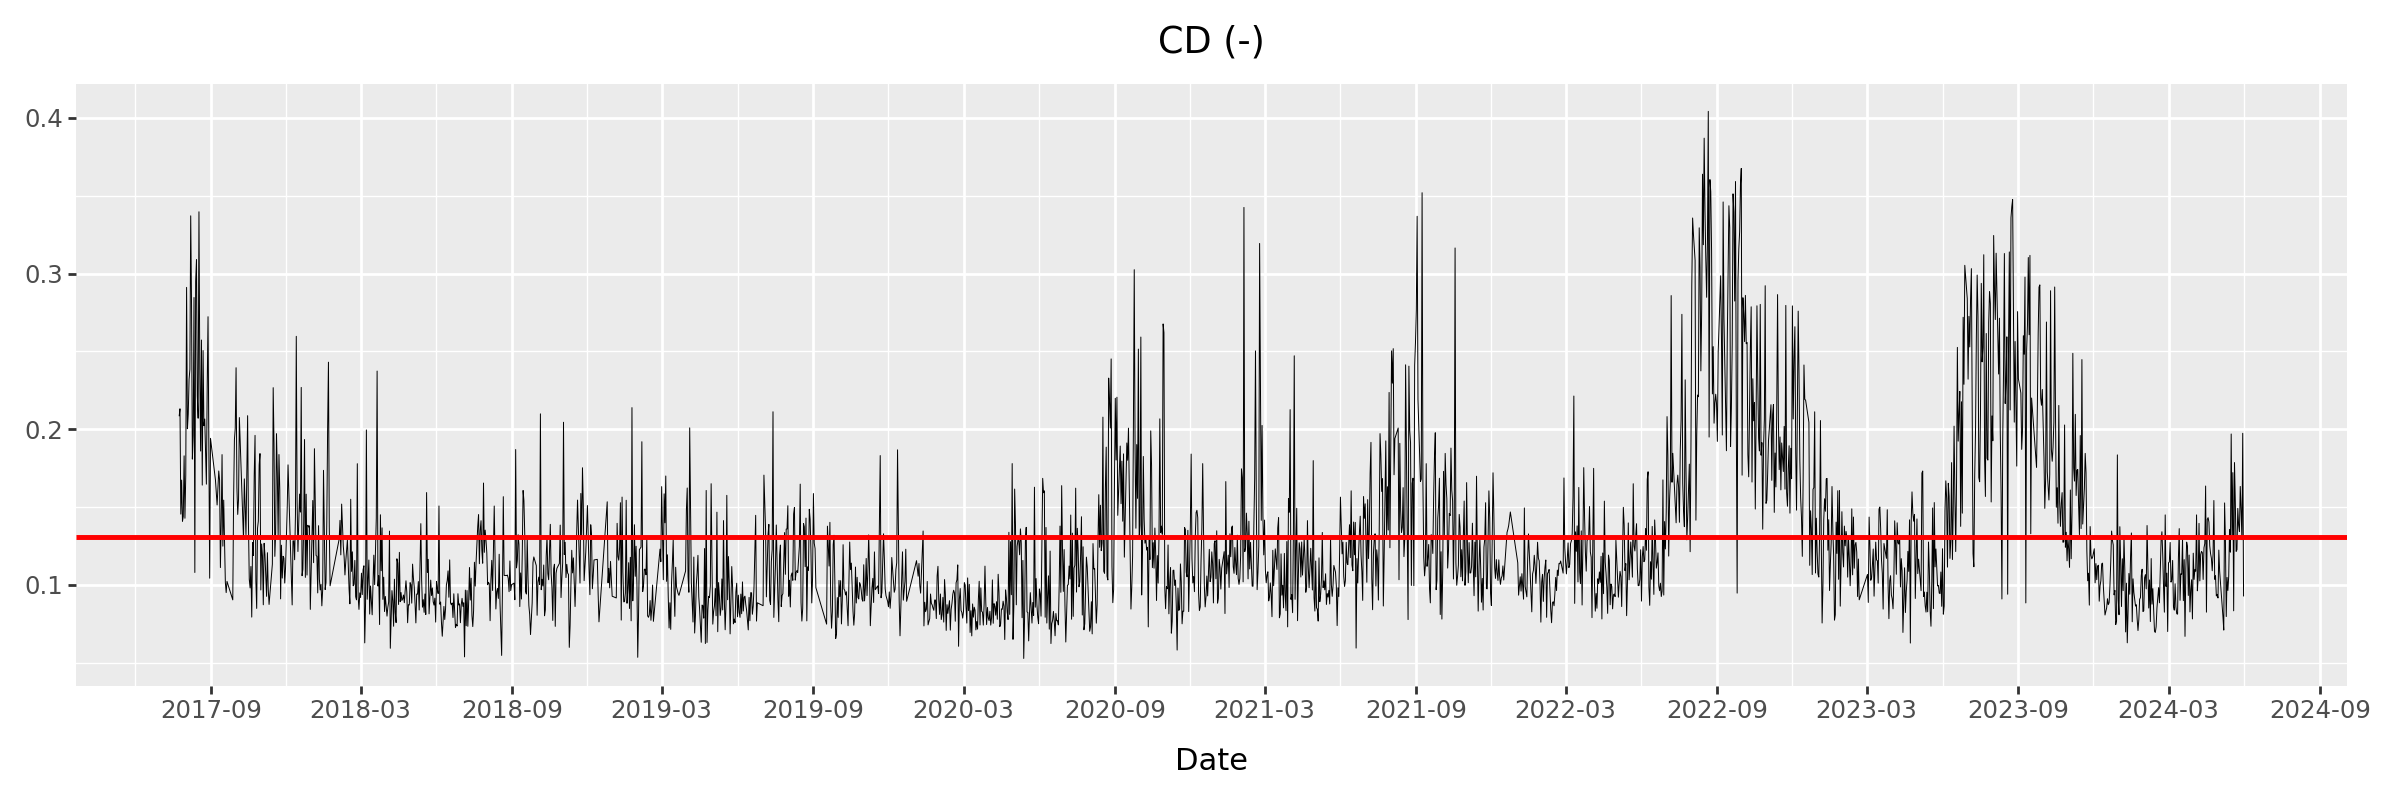

In [62]:
name = "CD"
unit = "-"
print(len(df.filter(pl.col(name) > (df[name].std()*5 + df[name].mean()))))
a = pl.DataFrame(df.filter(pl.col(name) >= (df[name].std()*5 + df[name].mean())))
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y=name), size=0.2)
    + geom_hline(aes(yintercept=df[name].mean()), color="red", size=1)
    + geom_point(data=df.filter(pl.col(name) > df[name].std()*5+df[name].mean()), mapping=aes(x="date", y=name), color="green")
    + labs(title=f"{name} ({unit})", x="Date", y="")
    + theme(figure_size=(12, 4))
    + scale_x_date(
        limits=(
            datetime(year=2017, month=7, day=24),
            datetime(year=2024, month=5, day=31)
        ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)# .save(f"../../fig/hrv/{name.lower()}.png", dpi=500)

In [58]:
a

date,CD,ApEn,SD1,SD2,SD1SD2
date,f64,f64,f64,f64,f64
2018-01-15,0.173551,0.592797,45.978292,141.896498,0.324027
2022-12-21,0.204425,0.519973,30.226484,142.673432,0.211858
